# Lecture 3 : Describing real cavities

### This notebook has originally been created for the CECAM Ab Initio QEDFT school (2024) by Mark Kamper Svendsen and Frieder Lindel. Minor modifications have been made by Dominik Sidler for the polaritonic / QED chemistry lecture.  

In this tutorial we will examine how Macroscopic Maxwell Equations can be used to calculate realistic cavity parameters for experimentally relevant cavity setups via the Dyadic Green's Function (DGF). In a first step, material properties of the Lorentz model for a dielectric and Drude model of metall are briefly investigated. In a second step, Maxwell's equations are solved for a spherical cavity made of a Drude metal. 



As an example, we will consider the layered spherical cavity setup shown below
<div>
<img src="mie_figure.jpeg" width="500"/>
</div>

As can be seen, the cavity setup consists of two concentric spheres: An inner sphere of radius $R$ and material properties described $\epsilon_2(\omega), \mu_2(\omega)$, and an outer sphere (which we take to have an infinite radius) with material properties described by $\epsilon_1(\omega), \mu_1(\omega)$.




## 3.1: Drude Model of a Metal

The mode structure of a given cavity - and therefore also the resulting coupling strength of an emitter to the field - is intricately related to the geometry and material composition of the cavity. Let's therefore first discuss the linear dielectric properties of different types of materials. Typically the mirrors of a cavity are made of metals, which can be conveniently be described by the Drude model that follows from the Lorentz model by setting the band gap to zero: 

\begin{align}
    \epsilon_\mathrm{Lorentz}(\omega) = 1 + \frac{\omega_p^2}{\omega_{\mathrm{gap}}^2 - \omega^2 -i\gamma\omega}.
\end{align}
with the derived Drude model:
\begin{align}
    \epsilon_\mathrm{Drude}(\omega) = 1 - \frac{\omega_p^2}{\omega^2 +i\gamma\omega}.
\end{align}

### Q. 3.1.1

Write python functions to calculate and plot the Drude single oscillator dielectric function. 






### Q. 3.1.2
Write a function that takes the plasma frequency and damping rate as input and makes a plot of the Drude dielectric function for $\hbar \omega_p = 15.3$ eV and $\hbar \gamma = 0.5984$ eV.

* Discuss the role of the plasma frequency on the metalic behaviour of the metal. What happens at the plasma frequency? 

### A. 3.1.2

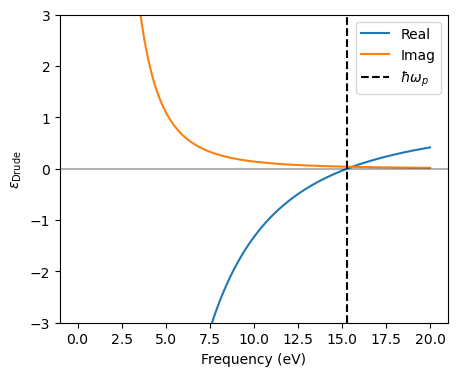

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def drude_metal(omegas, wp, gamma):
    """
    Helper function to get the drude dielectric function
    """
    return 1 - (wp**2/(omegas**2 + 1j*omegas*gamma))

wp = 15.3
gamma = 0.5984

omegas = np.linspace(0.01, 20, 1000)
drude = drude_metal(omegas, wp, gamma)

fig, ax = plt.subplots(1,1, figsize = (5,4))
ax.plot(omegas, np.real(drude), label = "Real")
ax.plot(omegas, np.imag(drude), label = "Imag")
ax.axvline(wp, linestyle = "--", color = "k", label = "$\hbar\omega_p$")
ax.axhline(0, color = "k", alpha = 0.3)
ax.legend()
ax.set_ylim([-3,3])
ax.set_xlabel('Frequency (eV)')
ax.set_ylabel("$\epsilon_\mathrm{Drude}$");

### Q. 3.1.4

The following table shows the best fit of the Drude model for a series of common metals [4]:

| Element | $\omega_p$ (eV) | $\gamma$ (eV) |
|:--------:|:--------:|:--------:|
|  Ag   |  9.6   |  0.0228  |
|  Au   |  8.55   |  0.0184   |
|  Al   |  15.3   |  0.5984   |
|  Na   |  5.71   | 0.0276  |
|  K  |  3.72   |  0.0184   |


Plot the Drude metal function for the 5 metals and discuss the differences between them (they will become evident in A. 3.2.2)


### A. 3.1.4

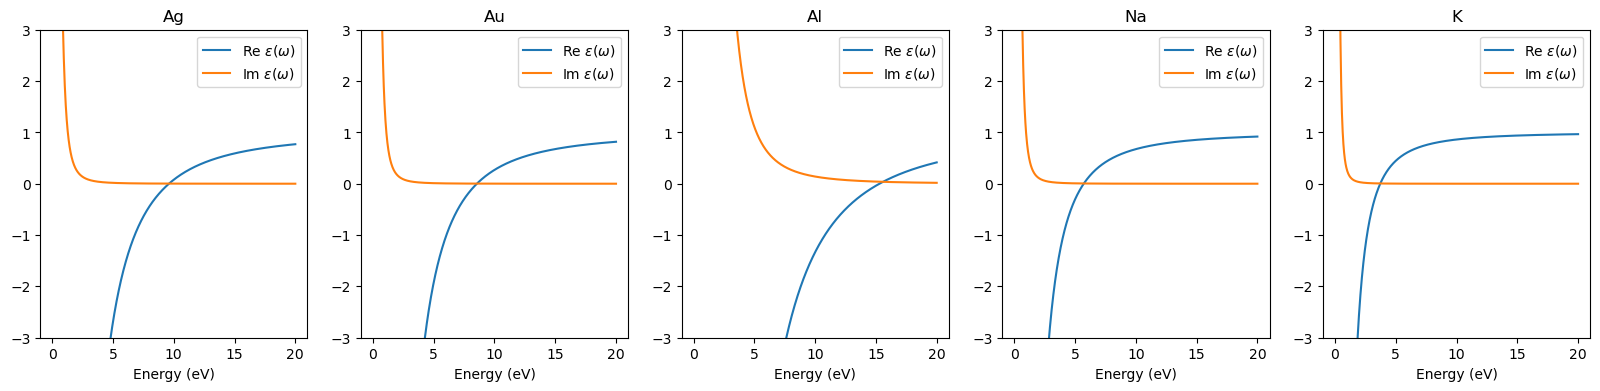

In [4]:
# Model parameters
omegas = np.linspace(0.01, 20, 1000)


metals = {}
metals['Ag'] = {'omega_p (eV)': 9.6, 'gamma_intra': 0.0228}
metals['Au'] = {'omega_p (eV)': 8.55, 'gamma_intra': 0.0184}
metals['Al'] = {'omega_p (eV)': 15.3, 'gamma_intra': 0.5984}
metals['Na'] = {'omega_p (eV)': 5.71, 'gamma_intra': 0.0276}
metals['K'] = {'omega_p (eV)': 3.72, 'gamma_intra': 0.0184}



fig, ax = plt.subplots(1,5, figsize = (20,4))
for i, metal in enumerate(metals):
    drude = drude_metal(omegas, metals[metal]['omega_p (eV)'], metals[metal]['gamma_intra'])
    ax[i].plot(omegas, np.real(drude), label = "Re $\epsilon(\omega)$")
    ax[i].plot(omegas, np.imag(drude), label = "Im $\epsilon(\omega)$")

    ax[i].legend()
    ax[i].set_title(metal)
    ax[i].set_ylim([-3,3])
    ax[i].set_xlabel('Energy (eV)')


**Optional:** Within the Drude model, the plasma frequency of gold is 8.55 eV which corrosponds to 145 nm. 

* Is this consistent with the yellow-ish color of gold?
* What are the relevant physical mechanism that the Drude model is missing?

## Q. 3.2 The field of spherical nano cavities


As a first example of a cavity, we consider the spherical setup consisting of two spherical layers: the spherical core with radius $R$ is filled with vacuum (permittivity $\epsilon_2 = 1$), which is surrounded by a metal described by a Drude permittivity $\epsilon_1 = \epsilon_\mathrm{Drude}$. We assume that this metal shell fills all of space except for the vacuum core, which means that we neglect the finite thickness of a realistic spherical cavity. While one can straightforwardly use macroscopic QED to go beyond this approximation, we will, for simplicity, not do so here.

### Mathematical Excurse: The Dyadic Green's Function


#### (**Ugly equations alert: The following equations look horibble, but as you will see below, they are actually fine to work with. So please don't despair, but you can of course skip it**)


In general, the source and field points ($\boldsymbol{r}$ and $\boldsymbol{r'}$ respectively) can be in either the same layer or different layers. Consequently,  the DGF for the reflected field is a 9-component object, where each component is a 3D dyad. Labeling the possible combinations of source and field points by two extra indices $a,b = 1,2$ and invoking the superposition principle stating that the total field will be the superposition of the free dipole field and the reflected field, the full DGF of the system can be written as [1,2],
\begin{align}
    \boldsymbol{G}_{ab}(\boldsymbol{r},\boldsymbol{r'},\omega) = \boldsymbol{G}^{\mathrm{vac}}(\boldsymbol{r},\boldsymbol{r'},\omega)\delta_{ab} +\boldsymbol{G}^\mathrm{ref}_{ab}(\boldsymbol{r},\boldsymbol{r'},\omega).
\end{align}
Here $\boldsymbol{G}^\mathrm{vac}$ is the free dipole field contribution and $\boldsymbol{G}^\mathrm{ref}$ is the reflected field contribution to the DGF. 


Because of the spherical symmetry of the setup, we will expand the DGF in terms of vector spherical harmonics. In particular, the relevant vector spherical harmonics are,
\begin{align}
    \boldsymbol{M}_{o,nm}^e(\boldsymbol{r}) &= \mp \frac{m}{\mathrm{sin}\,\theta}j_n(kr)P_n^m(\mathrm{cos}\,\theta)\begin{pmatrix}
           \mathrm{cos}(m\phi) \\
           \mathrm{sin}(m\phi)
         \end{pmatrix}
         \boldsymbol{e}_\theta - j_n(kr)\frac{dP_n^m(\mathrm{cos}\,\theta}{d\theta}\begin{pmatrix}
           \mathrm{cos}(m\phi) \\
           \mathrm{sin}(m\phi)
         \end{pmatrix}
         \boldsymbol{e}_\phi, \\
         \boldsymbol{N}_{o,nm}^e(\boldsymbol{r}) &= \mp \frac{n(n+1)}{kr}j_n(kr)P_n^m(\mathrm{cos}\,\theta)\begin{pmatrix}
           \mathrm{cos}(m\phi) \\
           \mathrm{sin}(m\phi)
         \end{pmatrix}
         \boldsymbol{e}_r + \frac{1}{kr}\frac{d(rj_n(kr))}{dr}\left[\frac{dP_n^m(\mathrm{cos}\,\theta}{d\theta}\begin{pmatrix}
           \mathrm{cos}(m\phi) \\
           \mathrm{sin}(m\phi)
         \end{pmatrix}
         \boldsymbol{e}_\theta\right. \nonumber \\
         &\left.\pm \frac{m}{\mathrm{sin}\,\theta}P_n^m(\mathrm{cos}\,\theta)\begin{pmatrix}
           \mathrm{cos}(m\phi) \\
           \mathrm{sin}(m\phi)
         \end{pmatrix} \boldsymbol{e}_\phi\right],
\end{align}
representing the electric- and magnetic type fields respectively. Here the trigonometric functions have to be chosen to match the parity index, $e,o$. $P_n^m(\mathrm{cos}\theta)$ are the associated Legendre polynomials, $j_n(x)$ are the Bessel functions of the first kind, and $\left\{\boldsymbol{e}_r,\boldsymbol{e}_\theta,\boldsymbol{e}_\phi\right\}$ are the standard unit vectors in spherical coordinates.






We will consider the situation where the inside of the sphere is used as a cavity volume, and the outside one acts as the mirror to confine the electromagnetic field. We will thus only need to consider a=b=2. In that case, the relevant DGF component is,
\begin{align}
    \boldsymbol{G}^\mathrm{ref}_{22}(\boldsymbol{r},\boldsymbol{r'},\omega) = &\frac{ik_2}{4\pi}\sum_{e,o}\sum_{n =  1}^\infty\sum_{m=0}^n\frac{(2n+1)(n-m)!}{n(n+1)(n+m)!}(2-\delta_{0,m})\times\nonumber \\& \left[r_n^{(22)s}(\omega)\boldsymbol{M}_{o,nm}^e(\boldsymbol{r})\otimes\boldsymbol{M}_{o,nm}^e(\boldsymbol{r'}) + r_n^{(22)p}(\omega)\boldsymbol{N}_{o,nm}^e(\boldsymbol{r})\otimes\boldsymbol{N}_{o,nm}^e(\boldsymbol{r'})\right].
\end{align}



The relevant reflection and tranmission coefficients can be worked out using standard Mie theory,
\begin{align}
r_n^{(22)s} &=&
-\frac{\mu_1k_2\xi_n(k_2R)h^{(1)}_n(k_1R)-\mu_2k_1\xi_n(k_1R)h^{(1)}
_n(k_2R)}%
{\mu_1k_2\eta_n(k_2R)h^{(1)}_n(k_1R)-\mu_2k_1\xi_n(k_1R)j_n(k_2R)}
\,,\\
r_n^{(22)p} &=&
-\frac{\mu_1k_2\xi_n(k_1R)h^{(1)}_n(k_2R)-\mu_2k_1\xi_n(k_2R)h^{(1)}
_n(k_1R)}%
{\mu_1k_2\xi_n(k_1R)j_n(k_2R)-\mu_2k_1\eta_n(k_2R)h^{(1)}_n(k_1R)} \,.
\end{align}

Here $h_n^{(1)}(x)$ is a Hankel function of the first kind, $k_i = \mathrm{Re}[\sqrt{\epsilon_i(\omega)}]\omega/c$ is the wavenumber in the material, and we have defined the Ricatti functions
\begin{align}
&\eta_n(k_iR):=\frac{1}{x} \left.\frac{d[xj_n(x)]}{dx}\right|_{x=k_iR}
\\\qquad
&\xi_n(k_iR):=\frac{1}{x}
\left.\frac{d[xh^{(1)}_n(x)]}{dx}\right|_{x=k_iR} \,.
\end{align}


## Dyadic Green's function for spherical setup
For this geometry, we can expand the DGF evaluated inside the cavity (inside the vacuum core) in terms of vector spherical harmonics, as shown above (the details you can find in Refs. [1-3]). At the center of the spherical cavity ($\mathbf{r}= \mathbf{r}^\prime = 0$), only the $n = 1$ transverse magnetic (p) mode is of importance. Consequently, the dyadic Green function at $\mathbf{r}= \mathbf{r}^\prime = 0$ can be written as:
\begin{align}
\boldsymbol{G}(\boldsymbol{r},\boldsymbol{r'},\omega)|_{r,r'\rightarrow 0} = \frac{i \omega}{6\pi c}[1 + r^{(22)p}_{n=1}(\omega)]\boldsymbol{I}.
\end{align}
Here, $r^{(22)p}_{n=1}(\omega)$ is the reflection coefficient for the lowest order transverse magnetic mode, which can be expressed as:
\begin{align}
r^{(22)p}_{n=1}(\omega) = \frac{\left[i + \rho(n(\omega) + 1) - i\rho^2n(\omega) - \frac{\rho^3n(\omega)^2}{n(\omega)+1}\right]e^{i\rho}}{\mathrm{sin}\rho - \rho(\mathrm{cos}\rho + in(\omega)\mathrm{sin}\rho) + i\rho^2n(\omega)\mathrm{cos}\rho - \rho^3(\mathrm{cos}\rho - in(\omega)\mathrm{sin}\rho)\frac{n(\omega)^2}{n(\omega)^2 - 1}},
\end{align}
where $n(\omega) = \sqrt{\epsilon(\omega)}$ is the refractive index and $\rho = R\omega/c$ is the standard size parameter from Mie theory.

### Q. 3.2.1

To investigate how the mode structure of the photon field depends on the geometry and material parameters, please do the following:
* Write a function that calculates the xx-component of the Dyadic Green's Function at $r=r'=0$ and plot the spectral density given by the imaginary part of the Green tensor for a Aluminium spherical cavity of radius $R = 500$ nm and $R = 1500$ nm.
* How does the mode structure depend on the radius of the cavity?
* How does the width of the modes relate to the losses in the metalic shell?
* Does the width of the resonances depend on the radius? If so, can you explain why?
* How is the loss of reflectivity at the plasma frequency manifested in the mode structure?


### A. 3.2.1

In [5]:
def get_reflection_coefficient(rho, n):
        """
        Function to get the reflection coefficient for the 
        lowest order TM mode of the cavity
        """
        numerator = np.exp(1j*rho)*(1j + rho*(n +1) - 1j*rho**2*n - rho**3*n**2/(n+1))
        denominator = np.sin(rho) - rho*(np.cos(rho) + 1j*n*np.sin(rho)) + 1j*rho**2*n*np.cos(rho) - rho**3*(np.cos(rho) - 1j*n*np.sin(rho))*n**2/(n**2-1)

        r22p = numerator/denominator

        return r22p


In [6]:
c = 3E8

def get_imG(omega, R, n):
    # Calculating size paramters
    rho = R*omega/c
    # Reflection coefficient for lowest order TM mode
    r22p = get_reflection_coefficient(rho, n)

    return omega/(6*np.pi*c)*(1 + np.real(r22p))

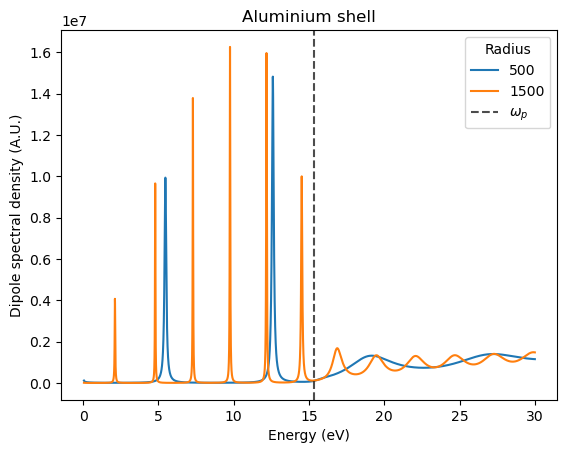

In [7]:
omegas = np.linspace(0.05,30, 10000)*2.417E14 # Converting to Hz


for R in np.array([500, 1500])*1E-9:
    eps_drude = drude_metal(omegas, metals['Al']['omega_p (eV)']*2.417E14, metals['Al']['gamma_intra']*2.417E14)
    spec = get_imG(omegas, R, np.sqrt(eps_drude))
    plt.plot(omegas/2.417E14, spec, label = '{r:0.0f}'.format(r=R*1E9))

plt.axvline(metals['Al']['omega_p (eV)'], linestyle = "--", color = "k", alpha = 0.7, label = "$\omega_p$")
plt.legend(title = "Radius")
plt.xlabel('Energy (eV)')
plt.ylabel('Dipole spectral density (A.U.)')
plt.title('Aluminium shell');


### Q. 3.2.2

Next, plot and investigate the impact of the material parameters on the spectral density by plotting the spectral density for cavities made of the different realistic metals listed in the table above for fixed radius $R = 1500$ nm.

* Why are the resonances of the spherical cavity different for different metals shells when the cavity has the same radius?
* Can you explain the trend of the width and frequencies of the resonances by relating them to the parameters of the different metals?

### A. 3.2.2

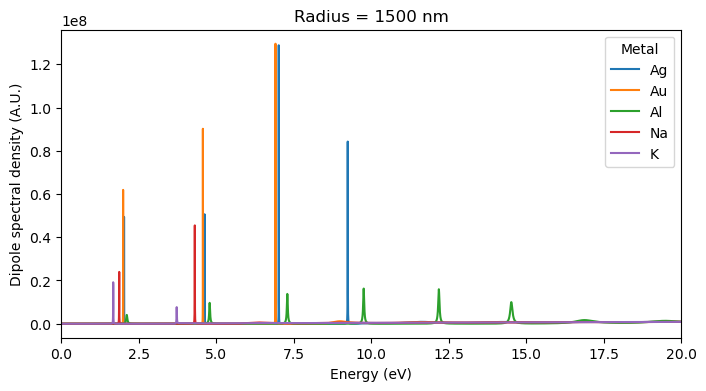

In [8]:
R = 1500E-9

fig, ax = plt.subplots(1,1, figsize = (8,4))
for metal in ['Ag', 'Au', 'Al', 'Na', 'K']: 
    eps_drude = drude_metal(omegas, metals[metal]['omega_p (eV)']*2.417E14, metals[metal]['gamma_intra']*2.417E14)
    spec = get_imG(omegas, R, np.sqrt(eps_drude))
    ax.plot(omegas/2.417E14, spec, label = metal)
plt.xlabel('Energy (eV)')
plt.ylabel('Dipole spectral density (A.U.)')
ax.legend(title = "Metal")
ax.set_title('Radius = {r:0.0f} nm'.format(r=R*1E9))
ax.set_xlim([0,20]);

# Conclusion
We have now seen that the size and material of the cavity can be engineered to modifiy the resonance frequency and lineshape of the cavity.
You may now wonder why we have introduced this complicated Green's function formalism. The reason for this is twofold:

First, from this formalism it is a relatively small step to generalize our classical framework to quantized fieldes in a macroscopic QED sense. However, in our lecture we will proceed with a more microscopic quantized picture. To model realistic cavity setups numerically, there is no way around macroscopic QED, however.

Second, the spherical geometry is one of the few examples where semi-analytic solutions of the Maxwell's equations are feasible. For more complex geometries, there is no way around pure numerics, which may be powerfull for practical applications, but provides less intuitive physical insights. 

# Bibliography

[1] W. C. Chew, Waves and fields in inhomogenous media, Vol. 16 (John Wiley & Sons, New York, 1999).

[2] L. W. Li, P. S. Kooi, M. S. Leong, and T. S. Yee. Electromagnetic dyadic Green's function in spherically multilayered media. IEEE Transactions on Microwave Theory and Techniques 42, 2302-2310 (1994).

[3] S. Scheel and S. Y. Buhmann, “Macroscopic QED-concepts and applications,” Acta Physica Slovaca 58, 675–809 (2008).

[4] Blaber, Martin G. et. al. "Search for the ideal plasmonic nanoshell: the effects of surface scattering and alternatives to gold and silver." The Journal of Physical Chemistry C 113.8 (2009): 3041-3045.